In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np

from RoadDataset import RoadDataset

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [4]:
val_datasets_path = "../notebooks/datasets/validation/"
sub_dirs = os.listdir(val_datasets_path)
val_dataset_paths = [[val_datasets_path + sub_dir + "/" + sub_dir + ".csv", val_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
val_dataset_paths

[['../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/Tag-Sonne-Wolken-Ausserorts.csv',
  '../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/frames/'],
 ['../notebooks/datasets/validation/Nacht-Schneechaos/Nacht-Schneechaos.csv',
  '../notebooks/datasets/validation/Nacht-Schneechaos/frames/']]

In [5]:
#dataset_paths = [dataset_paths[3]]

In [6]:
dataset_index = 0
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
my_batch_size = 16

train_datasets = []
for train_dataset_path in train_dataset_paths:
    train_dataset = RoadDataset(train_dataset_path[0], train_dataset_path[1], column_names, batch_size=my_batch_size)
    
    train_dataset.set_shift_range(100)
    
    train_dataset.clean()
    
    stats = train_dataset.get_csv().describe()
    stats = stats.transpose()
    print(stats)
        
    train_dataset.balance()
    
    stats = train_dataset.get_csv().describe()
    stats = stats.transpose()
    print(stats)
    
    train_dataset.normalize()
    print()
    if len(train_dataset) > 0:
        train_datasets.append(train_dataset)
        
val_datasets = []
for val_dataset_path in val_dataset_paths:
    val_dataset = RoadDataset(val_dataset_path[0], val_dataset_path[1], column_names, batch_size=my_batch_size)
    val_dataset.set_shift_range(0)
    val_dataset.clean()
    val_dataset.normalize()
    print()
    if len(val_dataset) > 0:
        val_datasets.append(val_dataset)
        

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Cleaning dataset. Starting with 8096 samples.
Removing 2058 rows for reason: Low speed (< 25 km/h)
Removing 218 rows for reason: High SWA (> +45/ < -45 deg)
Removing 125 rows for reason: Left blinker on
Removing 1 rows for reason: Right blinker on
5694 samples remaining.
                       count       mean        std     min     25%     50%  \
steering_wheel_angle  5694.0  -1.155364  12.883885 -44.830  -6.820  -1.440   
speed                 5694.0  52.164229  11.050994  25.017  47.461  50.685   
blink_l               5694.0   0.000000   0.000000   0.000   0.000   0.000   
blink_r               5694.0   0.000000   0.000000   0.000   0.000   0.000   

                          75%     max  
steering_wheel_angle   3.9400  44.950  
speed                 62.5425  71.362  
blink_l                0.0000   0.000  
blink_r                0.0000   0.000  
Bala

                       count       mean        std     min     25%     50%  \
steering_wheel_angle  5374.0  -1.776654  19.220768 -44.890 -16.030  -1.940   
speed                 5374.0  63.153236  14.882725  25.234  51.398  63.023   
blink_l               5374.0   0.000000   0.000000   0.000   0.000   0.000   
blink_r               5374.0   0.000000   0.000000   0.000   0.000   0.000   

                          75%      max  
steering_wheel_angle  12.2100   44.830  
speed                 74.0435  102.052  
blink_l                0.0000    0.000  
blink_r                0.0000    0.000  

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv
Loaded dataset with 2793 samples
Cleaning dataset. Starting with 2793 samples.
Removing 985 rows for reason: Low speed (< 25 km/h)
Removing 65 rows for reason: High SWA (> +45/ < -45 deg)
Removing 75 rows for reason: Left blinker on
Removing 9 rows for reason: Right blinker on
1659 samples remaining.
 

                        count       mean        std     min     25%    50%  \
steering_wheel_angle  14032.0  -0.430770  12.408302 -44.890  -4.320  -0.69   
speed                 14032.0  63.227637  18.877111  25.017  47.523  64.79   
blink_l               14032.0   0.000000   0.000000   0.000   0.000   0.00   
blink_r               14032.0   0.000000   0.000000   0.000   0.000   0.00   

                         75%      max  
steering_wheel_angle   3.690   44.830  
speed                 78.616  105.152  
blink_l                0.000    0.000  
blink_r                0.000    0.000  
Balancing dataset. Starting with 14032 samples.
[144, 116, 116, 263, 264, 301, 436, 1565, 4938, 2835, 1171, 560, 530, 278, 260, 96, 90, 69]
487
5355 samples remaining.
                       count       mean        std     min     25%     50%  \
steering_wheel_angle  5355.0  -0.139951  19.367316 -44.890 -13.270   0.310   
speed                 5355.0  59.746309  16.617129  25.017  47.337  61.349   
blink_l

                       count       mean        std     min      25%     50%  \
steering_wheel_angle  5352.0  -1.564000  13.563753 -44.830  -7.2775  -0.810   
speed                 5352.0  56.687746  15.684442  25.172  45.7560  50.375   
blink_l               5352.0   0.000000   0.000000   0.000   0.0000   0.000   
blink_r               5352.0   0.000000   0.000000   0.000   0.0000   0.000   

                         75%     max  
steering_wheel_angle   4.525  44.330  
speed                 74.896  85.188  
blink_l                0.000   0.000  
blink_r                0.000   0.000  
Balancing dataset. Starting with 5352 samples.
[34, 47, 100, 119, 185, 388, 314, 339, 1488, 1034, 544, 241, 218, 120, 84, 38, 45, 14]
178
2203 samples remaining.
                       count       mean        std     min    25%    50%  \
steering_wheel_angle  2203.0  -2.230136  19.455863 -44.830 -17.34  -1.38   
speed                 2203.0  52.470420  13.809482  25.544  44.33  48.36   
blink_l            

[52, 44, 76, 157, 240, 440, 803, 1512, 3654, 3540, 984, 795, 251, 170, 112, 65, 106, 58]
295
3396 samples remaining.
                       count       mean        std    min      25%     50%  \
steering_wheel_angle  3396.0  -0.425477  19.133914 -44.77 -15.2275  -0.500   
speed                 3396.0  69.614571  23.881585  26.97  54.5910  63.333   
blink_l               3396.0   0.000000   0.000000   0.00   0.0000   0.000   
blink_r               3396.0   0.000000   0.000000   0.00   0.0000   0.000   

                          75%      max  
steering_wheel_angle  12.2700   44.890  
speed                 78.7865  148.583  
blink_l                0.0000    0.000  
blink_r                0.0000    0.000  

Reading csv file: ../notebooks/datasets/train/Sun Feb 21 22:00:30 2021/Sun Feb 21 22:00:30 2021.csv
Failed to read csv file!
Loaded dataset with 0 samples
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for reason: High SWA (

Loaded dataset with 22182 samples
Cleaning dataset. Starting with 22182 samples.
Removing 677 rows for reason: Low speed (< 25 km/h)
Removing 316 rows for reason: High SWA (> +45/ < -45 deg)
Removing 447 rows for reason: Left blinker on
Removing 786 rows for reason: Right blinker on
19956 samples remaining.
                        count       mean        std     min     25%      50%  \
steering_wheel_angle  19955.0  -0.558069   6.072278 -43.580  -1.130   -0.250   
speed                 19955.0  99.154069  26.612368  25.327  81.034  109.523   
blink_l               19955.0   0.000000   0.000000   0.000   0.000    0.000   
blink_r               19955.0   0.000000   0.000000   0.000   0.000    0.000   

                          75%     max  
steering_wheel_angle    0.630   44.26  
speed                 117.986  140.12  
blink_l                 0.000    0.00  
blink_r                 0.000    0.00  
Balancing dataset. Starting with 19956 samples.
[34, 103, 44, 61, 53, 237, 302, 493, 10079

                        count       mean        std     min     25%    50%  \
steering_wheel_angle  33043.0  -1.130252   9.266317 -44.770  -3.690  -1.13   
speed                 33043.0  68.197063  18.324481  25.017  55.738  67.89   
blink_l               33043.0   0.000000   0.000000   0.000   0.000   0.00   
blink_r               33043.0   0.000000   0.000000   0.000   0.000   0.00   

                         75%     max  
steering_wheel_angle   1.380   44.89  
speed                 79.391  114.70  
blink_l                0.000    0.00  
blink_r                0.000    0.00  
Balancing dataset. Starting with 33043 samples.
[101, 120, 139, 197, 399, 875, 1627, 3274, 14929, 6490, 2526, 960, 495, 302, 263, 144, 117, 85]
562
6296 samples remaining.
                       count       mean        std     min       25%     50%  \
steering_wheel_angle  6296.0  -0.328015  18.770278 -44.770 -14.21000  -0.380   
speed                 6296.0  61.837742  17.871724  25.203  48.63125  61.628   
bl

                       count       mean        std     min     25%     50%  \
steering_wheel_angle  3332.0  -1.589898  14.264100 -44.950  -9.535  -0.380   
speed                 3332.0  64.521606  16.673664  25.916  54.157  62.589   
blink_l               3332.0   0.000000   0.000000   0.000   0.000   0.000   
blink_r               3332.0   0.000000   0.000000   0.000   0.000   0.000   

                         75%     max  
steering_wheel_angle   6.155  44.890  
speed                 81.189  91.357  
blink_l                0.000   0.000  
blink_r                0.000   0.000  
Balancing dataset. Starting with 3332 samples.
[44, 28, 67, 86, 89, 264, 237, 214, 703, 679, 377, 205, 148, 83, 64, 12, 15, 17]
116
1433 samples remaining.
                       count       mean        std     min     25%     50%  \
steering_wheel_angle  1433.0  -2.910726  19.751141 -44.950 -17.590  -1.630   
speed                 1433.0  58.590087  15.420514  25.916  50.654  57.195   
blink_l               14

                     count unique  top freq
filename                 0      0  NaN  NaN
steering_wheel_angle     0      0  NaN  NaN
speed                    0      0  NaN  NaN
blink_l                  0      0  NaN  NaN
blink_r                  0      0  NaN  NaN

Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:15 2021/Sun Jan 10 11:31:15 2021.csv
Loaded dataset with 19259 samples
Cleaning dataset. Starting with 19259 samples.
Removing 1860 rows for reason: Low speed (< 25 km/h)
Removing 1685 rows for reason: High SWA (> +45/ < -45 deg)
Removing 34 rows for reason: Left blinker on
Removing 202 rows for reason: Right blinker on
15478 samples remaining.
                        count       mean        std     min     25%    50%  \
steering_wheel_angle  15478.0  -0.327471  13.095913 -44.950  -4.760  -0.88   
speed                 15478.0  62.069601  19.574008  25.048  48.019  61.38   
blink_l               15478.0   0.000000   0.000000   0.000   0.000   0.00   
blink_r      

In [7]:
train_sets = train_datasets
np.random.shuffle(train_sets)
val_sets = val_datasets

In [8]:
train_samples = 0
for train_set in train_sets:
    train_samples += len(train_set) * my_batch_size
    
print("Total train samples: {}".format(train_samples))

Total train samples: 102064


In [9]:
len(train_sets)

34

In [10]:
for train_set in train_sets:
    stats = train_set.get_csv().describe()
    stats = stats.transpose()
    print(stats)

                       count       mean        std        min        25%  \
steering_wheel_angle  2203.0  -0.024779   0.216176  -0.498111  -0.192667   
speed                 2203.0  52.470420  13.809482  25.544000  44.330000   
blink_l               2203.0   0.000000   0.000000   0.000000   0.000000   
blink_r               2203.0   0.000000   0.000000   0.000000   0.000000   

                            50%        75%        max  
steering_wheel_angle  -0.015333   0.148889   0.492556  
speed                 48.360000  55.691500  85.095000  
blink_l                0.000000   0.000000   0.000000  
blink_r                0.000000   0.000000   0.000000  
                       count       mean        std        min        25%  \
steering_wheel_angle  4140.0  -0.011415   0.211664  -0.494556  -0.173222   
speed                 4140.0  53.457935  15.266092  25.048000  37.905250   
blink_l               4140.0   0.000000   0.000000   0.000000   0.000000   
blink_r               4140.0   0.00

                       count       mean        std        min        25%  \
steering_wheel_angle  6296.0  -0.003645   0.208559  -0.497444  -0.157889   
speed                 6296.0  61.837742  17.871724  25.203000  48.631250   
blink_l               6296.0   0.000000   0.000000   0.000000   0.000000   
blink_r               6296.0   0.000000   0.000000   0.000000   0.000000   

                            50%        75%         max  
steering_wheel_angle  -0.004222   0.140556    0.498778  
speed                 61.628000  73.067000  114.576000  
blink_l                0.000000   0.000000    0.000000  
blink_r                0.000000   0.000000    0.000000  
                       count       mean        std        min        25%  \
steering_wheel_angle  1310.0  -0.039939   0.223081  -0.493222  -0.222556   
speed                 1310.0  56.027673  13.138280  25.141000  50.127000   
blink_l               1310.0   0.000000   0.000000   0.000000   0.000000   
blink_r               1310.0  

                      count       mean        std        min        25%  \
steering_wheel_angle  986.0  -0.042145   0.221239  -0.499444  -0.230222   
speed                 986.0  53.729068  18.932643  25.141000  37.696000   
blink_l               986.0   0.000000   0.000000   0.000000   0.000000   
blink_r               986.0   0.000000   0.000000   0.000000   0.000000   

                          50%        75%        max  
steering_wheel_angle  -0.0320   0.143972   0.445889  
speed                 51.3825  61.876000  98.797000  
blink_l                0.0000   0.000000   0.000000  
blink_r                0.0000   0.000000   0.000000  
                      count       mean        std        min        25%  \
steering_wheel_angle  545.0  -0.040514   0.219280  -0.490444  -0.191333   
speed                 545.0  43.070376  10.415354  25.482000  34.193000   
blink_l               545.0   0.000000   0.000000   0.000000   0.000000   
blink_r               545.0   0.000000   0.000000   0.

In [11]:
len(val_sets)

2

In [12]:
#dataset.pairplot()

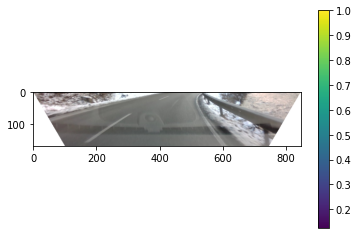

In [13]:
import matplotlib.pyplot as plt
image = train_sets[8].get_batch_features(0)[0]/255
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ELU, Conv2D, MaxPooling2D, Dense, Flatten, Lambda, Dropout, BatchNormalization

ch, row, col = 3, 170, 848

model = Sequential([
  Lambda(lambda x: x/127.5 - 1., input_shape=(row, col, ch), output_shape=(row, col, ch)),
  MaxPooling2D(pool_size=(1,3), strides=(1,3), padding='valid'),
    
  Conv2D(filters=16, kernel_size=(7,7), strides=(2,2), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
  Conv2D(filters=32, kernel_size=(5,5), strides=(2, 2), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
  Conv2D(filters=64, kernel_size=(5,5), strides=(2, 2), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
  Flatten(),
  Dropout(.2),
  #ELU(),
    
  Dense(64),
  Dropout(.5),
  ELU(),
    
  Dense(64),
  Dropout(.5),
  ELU(),
  
  Dense(1)

])
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 170, 848, 3)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 170, 282, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 82, 138, 16)       2368      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 69, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 33, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 16, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 6, 64)          5

In [16]:
import numpy as np
import matplotlib.pylab as plt


def get_smoothness_score(series):
    
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    smooth = running_mean(series, 9)
    diff = series[4:-4] - smooth
    
    smoothness = 1/np.mean(np.abs(diff))
    print(smoothness)
    return smoothness

In [17]:
from tensorflow.keras.preprocessing.image import img_to_array
def dataset_thumbs(dataset):
    
    thumbs = 5
    frames = dataset.get_batch_size()*len(dataset)-1

    plt.figure(figsize=(15,3))
    for i in range(thumbs):
        frame = img_to_array(dataset.get_frame(frames//thumbs*i)[0])/255
        cropped_frame = img_to_array(dataset.get_cropped_frame(frames//thumbs*i, 0)[0])/255
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(frame)
        plt.subplot(2,5,i+6)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cropped_frame)
        #plt.xlabel(class_names[train_labels[i]])
    plt.show()

Starting Epoch 1 for all datasets


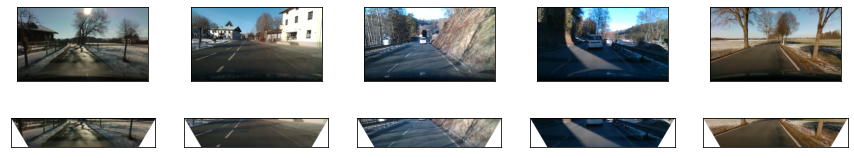

137/137 [==============================] - 29s 212ms/step - loss: 0.0939 - mse: 0.0939 - mae: 0.2350


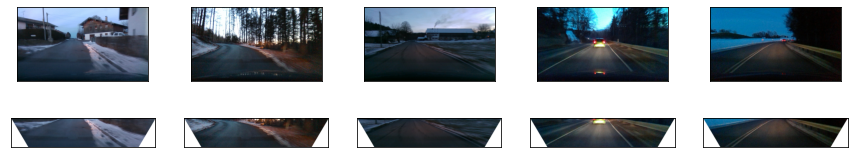

258/258 [==============================] - 54s 209ms/step - loss: 0.0455 - mse: 0.0455 - mae: 0.1678


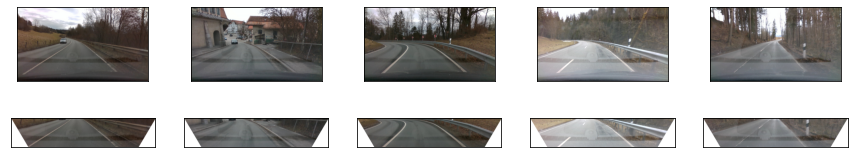

420/420 [==============================] - 85s 203ms/step - loss: 0.0270 - mse: 0.0270 - mae: 0.1270


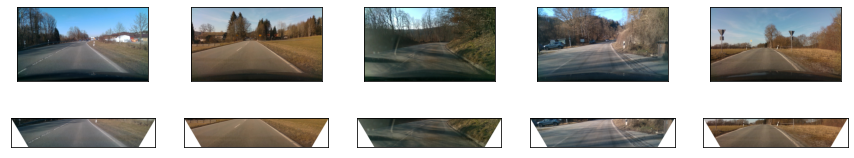

89/89 [==============================] - 19s 209ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1528


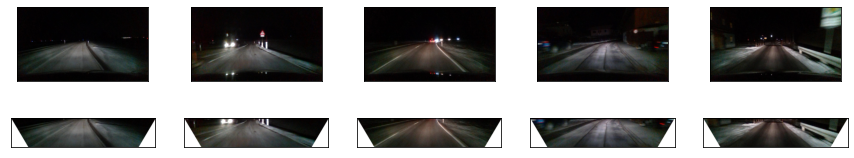

87/87 [==============================] - 18s 202ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1465


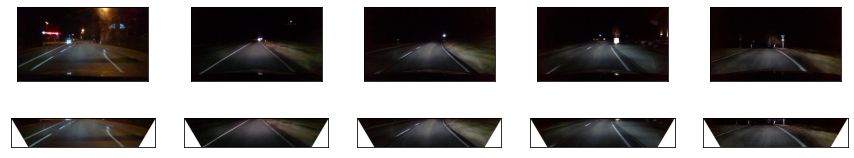

83/83 [==============================] - 17s 204ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1302


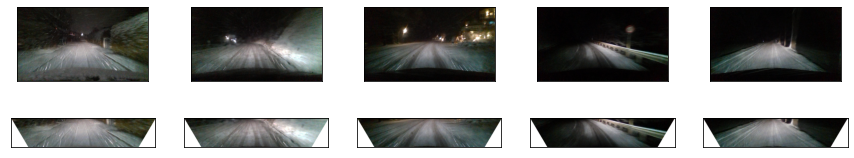

132/132 [==============================] - 27s 201ms/step - loss: 0.0326 - mse: 0.0326 - mae: 0.1411


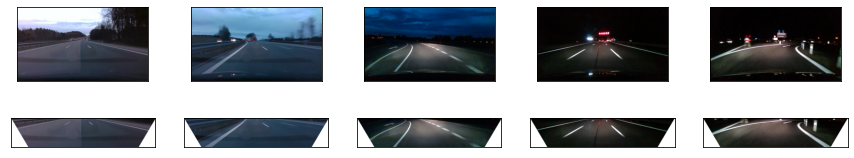

616/616 [==============================] - 125s 204ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1234


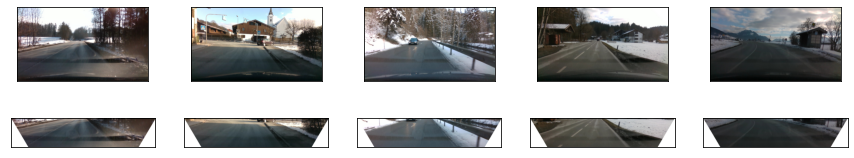

339/339 [==============================] - 68s 202ms/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1087


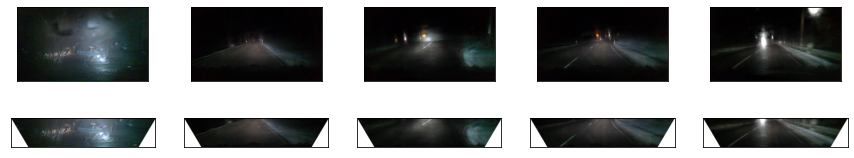

80/80 [==============================] - 16s 197ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1170


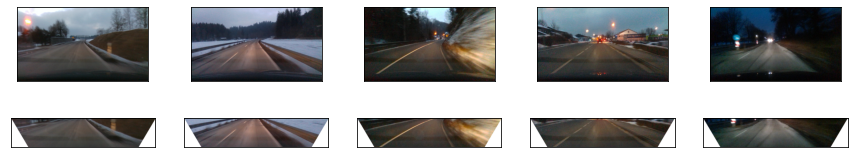

335/335 [==============================] - 68s 202ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0909


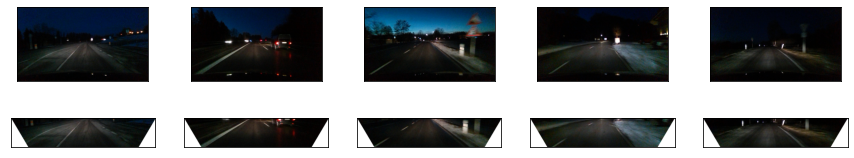

139/139 [==============================] - 27s 196ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0955


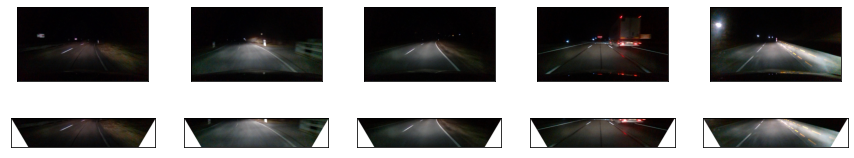

212/212 [==============================] - 41s 194ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0878


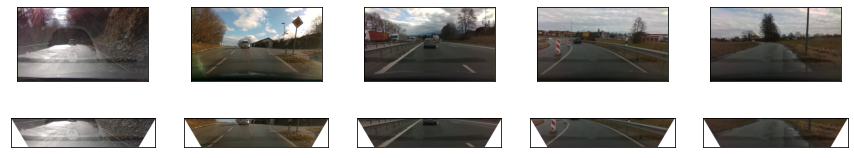

241/241 [==============================] - 47s 197ms/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1074


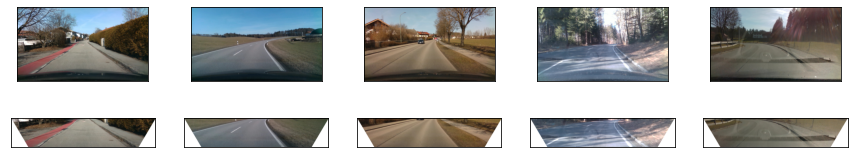

458/458 [==============================] - 91s 199ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0978


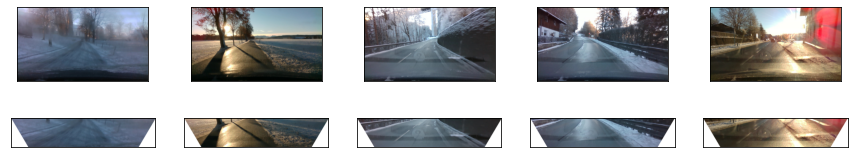

119/119 [==============================] - 24s 198ms/step - loss: 0.0273 - mse: 0.0273 - mae: 0.1270


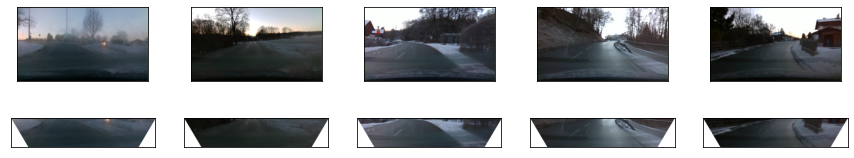

95/95 [==============================] - 18s 193ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.1033


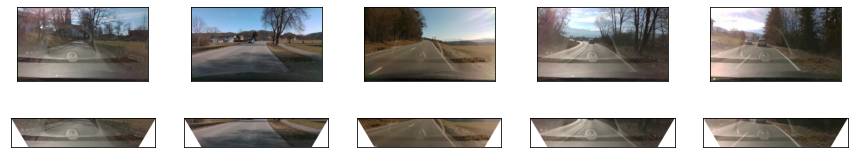

393/393 [==============================] - 79s 200ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0909


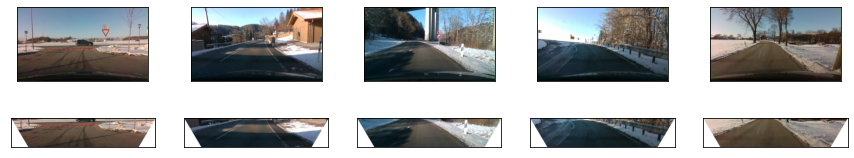

81/81 [==============================] - 16s 201ms/step - loss: 0.0179 - mse: 0.0179 - mae: 0.1055


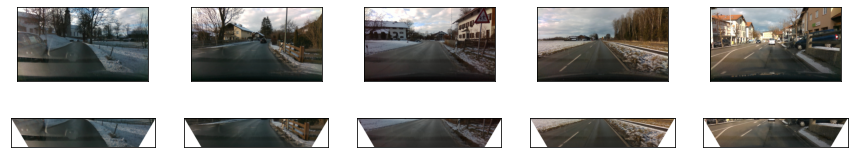

105/105 [==============================] - 21s 197ms/step - loss: 0.0180 - mse: 0.0180 - mae: 0.1030


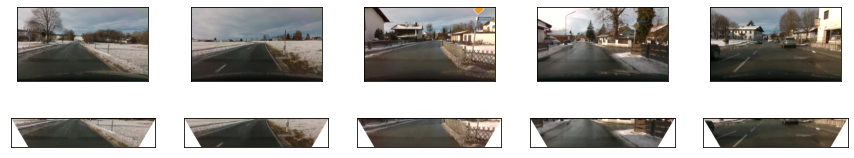

20/20 [==============================] - 4s 188ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0931


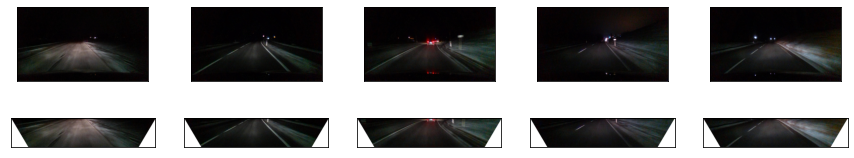

301/301 [==============================] - 59s 196ms/step - loss: 0.0148 - mse: 0.0148 - mae: 0.0933


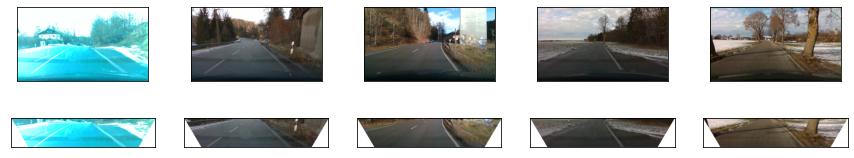

89/89 [==============================] - 18s 200ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0918


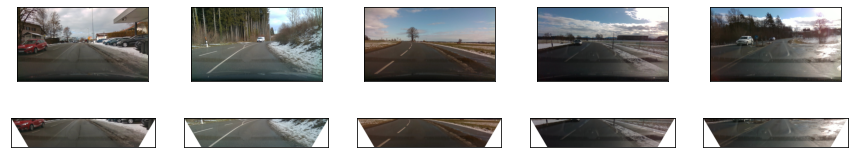

29/29 [==============================] - 6s 195ms/step - loss: 0.0158 - mse: 0.0158 - mae: 0.0939


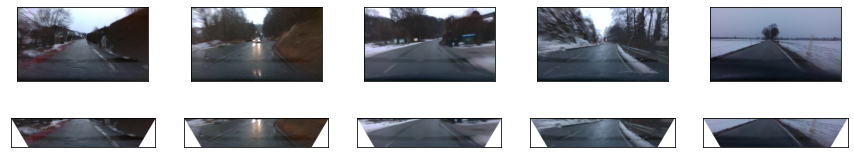

127/127 [==============================] - 24s 190ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0923


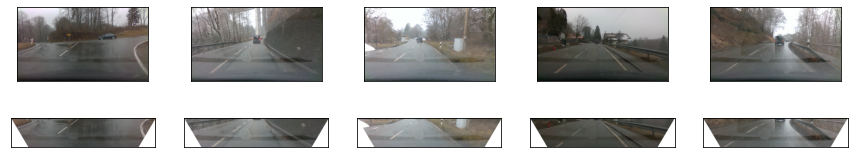

53/53 [==============================] - 10s 191ms/step - loss: 0.0148 - mse: 0.0148 - mae: 0.0918


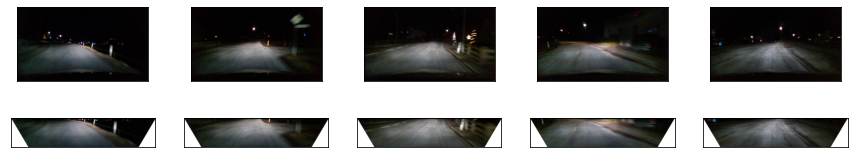

116/116 [==============================] - 22s 191ms/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0937


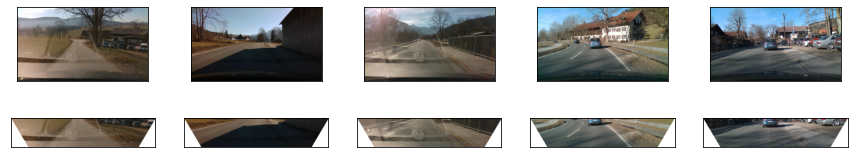

397/397 [==============================] - 80s 200ms/step - loss: 0.0177 - mse: 0.0177 - mae: 0.0999


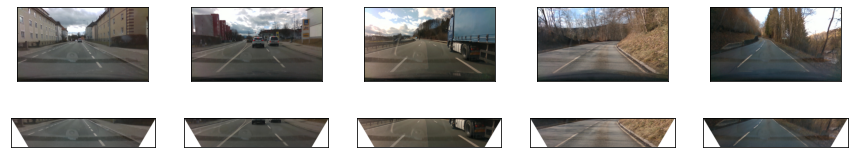

166/166 [==============================] - 33s 198ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0908


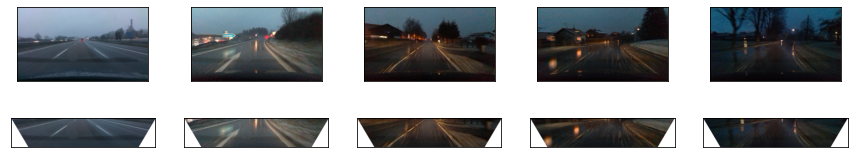

93/93 [==============================] - 18s 199ms/step - loss: 0.0233 - mse: 0.0233 - mae: 0.1150


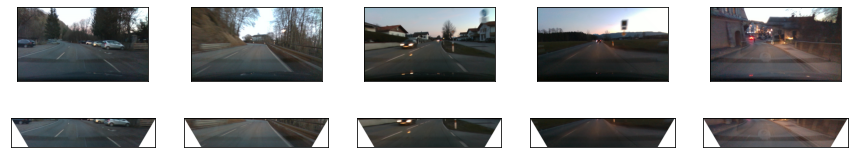

61/61 [==============================] - 12s 202ms/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1041


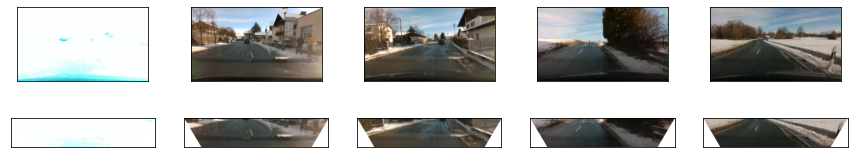

34/34 [==============================] - 6s 191ms/step - loss: 0.0151 - mse: 0.0151 - mae: 0.0981


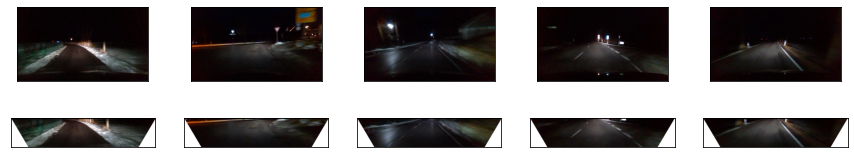

140/140 [==============================] - 27s 195ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0987


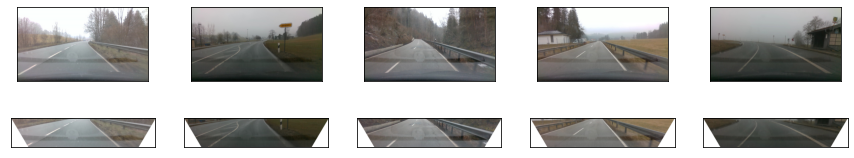

334/334 [==============================] - 66s 196ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0854



Starting Epoch 2 for all datasets
334/334 [==============================] - 63s 189ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0844



Starting Epoch 3 for all datasets
334/334 [==============================] - 63s 189ms/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0832



Starting Epoch 4 for all datasets
335/335 [==============================] - 66s 197ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0814


334/334 [==============================] - 63s 189ms/step - loss: 0.0110 - mse: 0.0110 - mae: 0.0804



Starting Epoch 5 for all datasets
334/334 [==============================] - 64s 191ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0819



Starting Epoch 6 for all datasets
227/420 [===============>..............] - ETA: 37s - loss: 0.0115 - mse: 0.0115 - mae: 0.0810

KeyboardInterrupt: 

In [18]:
model_name = 'diypilot_v14_smaller_crop_wider_white_corners_random_shift'
epochs = 200

for epoch in range(epochs):
    print("Starting Epoch {} for all datasets".format(epoch+1))
    for train_set in train_sets:
        if epoch == 0:
            dataset_thumbs(train_set)
        model.fit(train_set, epochs=1, verbose=1, use_multiprocessing=False, workers=1)
        
    model.save('./trained_models/' + model_name + "_epoch_" + str(epoch+1) + '.h5')
        
    print()
    #i = 1
    #for val_set in val_sets:
    #    loss = model.evaluate(val_set, verbose=1)
    #    predictions = model.predict(val_set, verbose=1)
    #    predictions_degrees = [x[0]*90 for x in predictions.tolist()]
    #    get_smoothness_score(predictions_degrees)
    #    #print("Validation Set {} loss: {}".format(i, loss))
    #    i+=1
        
    print()
    print()
    